/tmp/ipykernel_214982/453573712.py:73: RuntimeWarning: divide by zero encountered in log
  ax.plot(tobs, np.log(Ldnu_cgs), color=colors[i], label=labels[i])


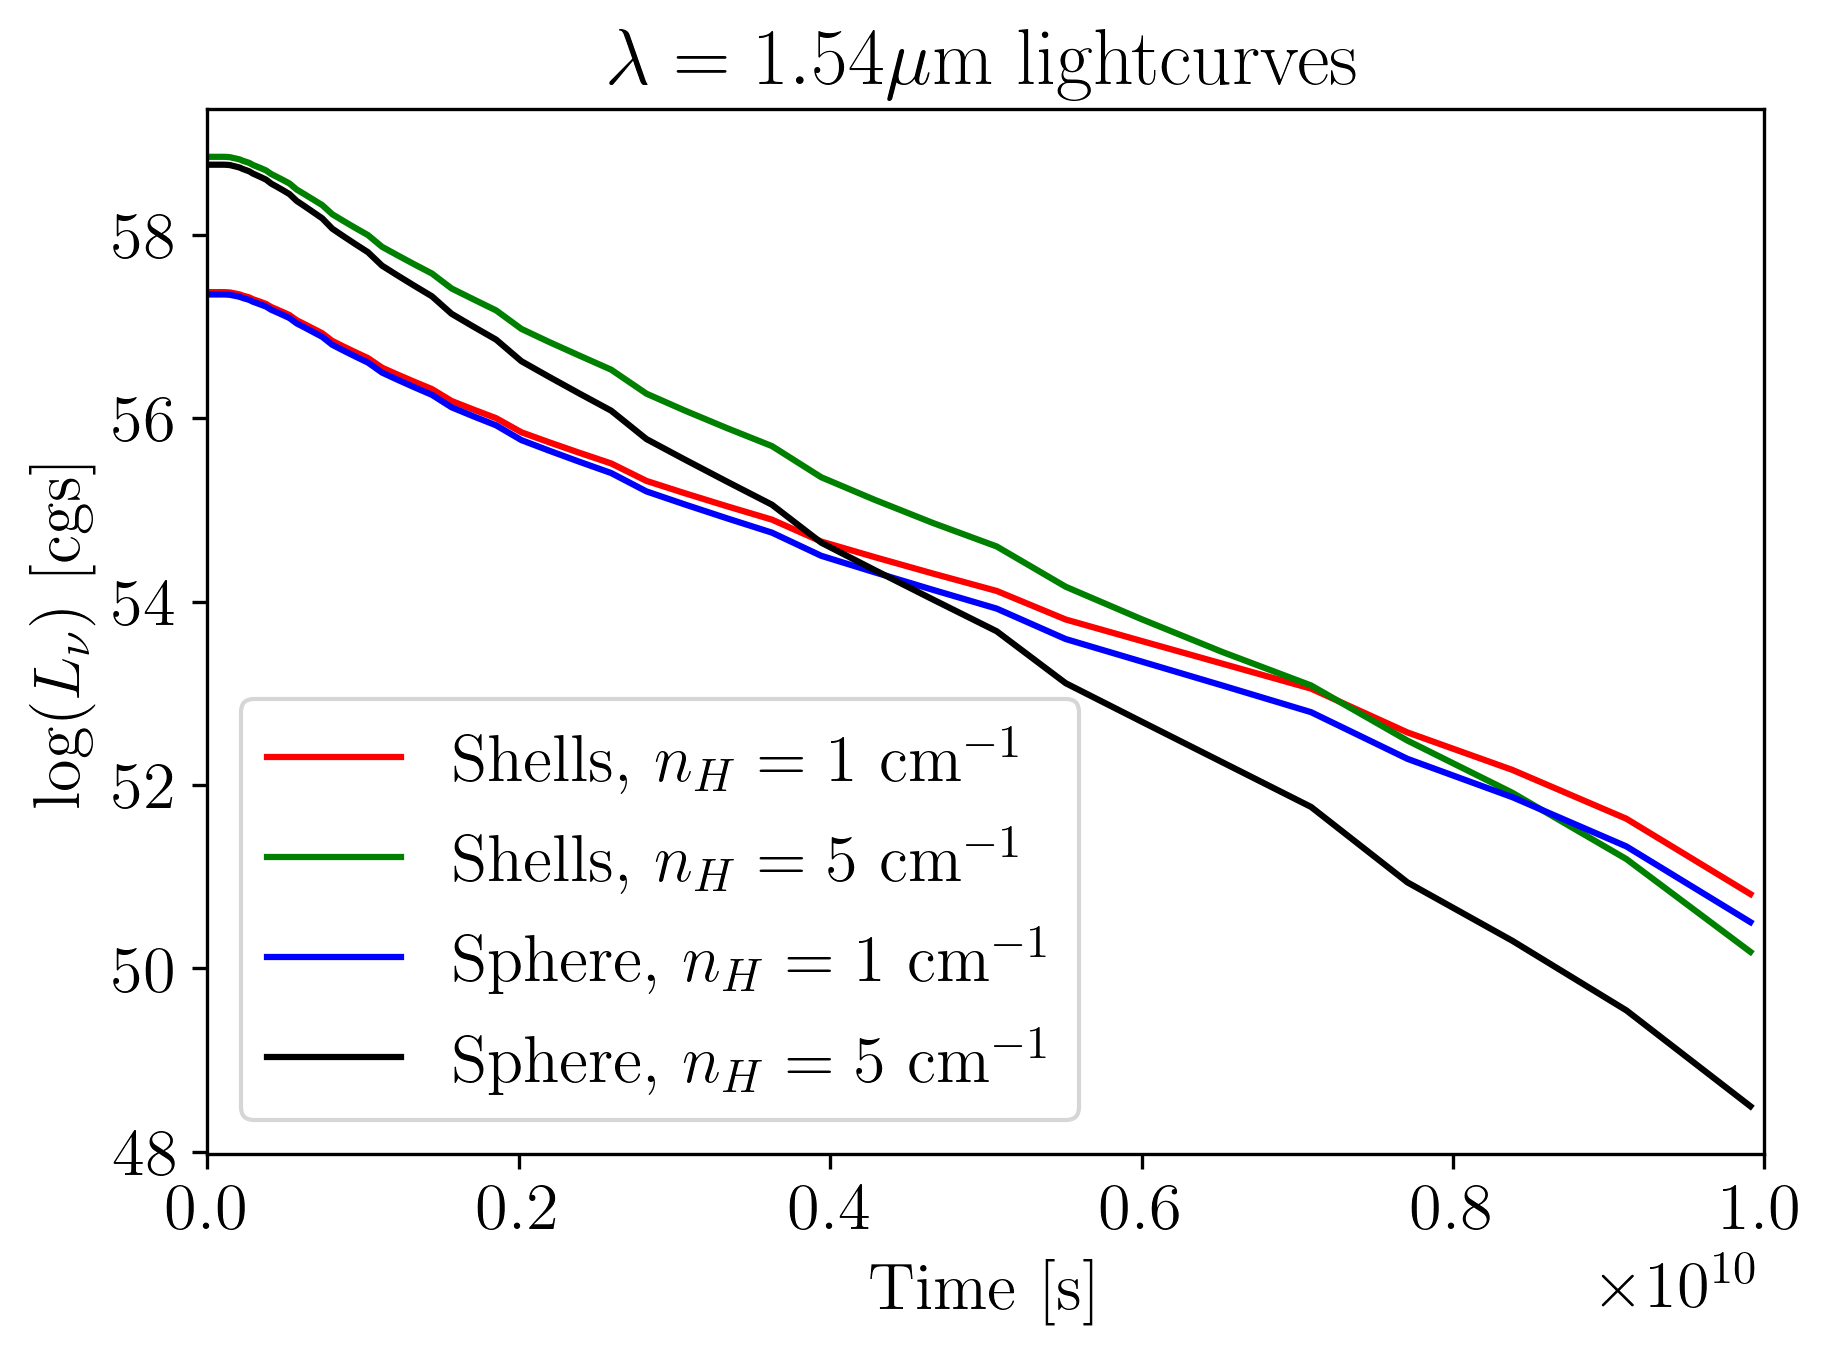

'\nif __name__ == "__main__":\n    if len(sys.argv) != 2:\n        print("Usage: python3 script_file.py data_file.txt")\n    else:\n        filename = sys.argv[1]\n        main(filename)\n'

<Figure size 1920x1440 with 0 Axes>

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import sys
import re

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 300
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

filenames = ["shell_dust_nH1.txt",
             "shell_dust_nH5.txt",
             "sphere_dust_nH1.txt",
             "sphere_dust_nH5.txt"]

labels = ["Shells, $n_H = 1$ cm$^{-1}$",
          "Shells, $n_H = 5$ cm$^{-1}$",
          "Sphere, $n_H = 1$ cm$^{-1}$",
          "Sphere, $n_H = 5$ cm$^{-1}$",]

#colormap = plt.cm.autumn
#norm = plt.Normalize(vmin=1, vmax=5)  # Normalize lam values
#colors = [colormap(norm(nh)) for nh in [1, 2, 3, 4]]
colors = ["red", "green", "blue", "black"]

# Initialize the plot
fig, ax = plt.subplots()

ax.set_xlabel('Time [s]')
ax.set_ylabel('log($L_{\\nu}$) [cgs]')

for i in range(len(filenames)):
    filename = filenames[i]
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    # Assign the three floats to variables
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    
    # Load the data from the text file
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    xcentr_pc = data[1]

    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    # Create the logarithmic space with normalized values
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)

    ax.plot(tobs, np.log(Ldnu_cgs), color=colors[i], label=labels[i])

plt.title("$\\lambda = 1.54 \\mu$m lightcurves")
plt.xlim(left=0, right=1e10)
plt.legend()
fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()   

plotfile="plot_nH"+str(nH)+".png"
plt.savefig(plotfile)

"""
if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python3 script_file.py data_file.txt")
    else:
        filename = sys.argv[1]
        main(filename)
"""
